# Global Covid-19 Data Analysis

In [1]:
# Key Questions to ask when analysing this data set
# Questions to ask for Q1
# Population density vs Total infections? (linear regression) 
# GDP/Poverty vs death rate, # Poverty vs infection rate 
# Random sample of HDI vs total cases and death rate



In [150]:
# Importing the relevant dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import matplotlib
import datetime
import time
from sklearn.preprocessing import MinMaxScaler
import gmaps
from pylab import savefig
from sklearn.linear_model import RidgeCV

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

# To Display all the columns in the DataFrame
pd.options.display.max_columns=None

# Creating a timestamp to plot in the graphs
current_time = datetime.datetime.now()

In [131]:
# Opening the file and creating a DataFrame
raw_covid_19_data = pd.read_csv('Resources\owid-covid-data.csv')
raw_covid_19_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,18.733,18.733,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,37.465,18.733,2.676,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47111,NaN,NaN,International,2020-09-26,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47112,NaN,NaN,International,2020-09-27,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47113,NaN,NaN,International,2020-09-28,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47114,NaN,NaN,International,2020-09-29,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# Substituting NaN data with a zero integer
raw_covid_19_data = raw_covid_19_data.fillna(0)
raw_covid_19_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.000,0.0,0.0,0.0,18.733,18.733,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
1,ABW,North America,Aruba,2020-03-19,0.0,0.0,0.286,0.0,0.0,0.0,0.000,0.000,2.676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,37.465,18.733,2.676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
3,ABW,North America,Aruba,2020-03-21,0.0,0.0,0.286,0.0,0.0,0.0,0.000,0.000,2.676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
4,ABW,North America,Aruba,2020-03-22,0.0,0.0,0.286,0.0,0.0,0.0,0.000,0.000,2.676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47111,0,0,International,2020-09-26,696.0,0.0,0.000,7.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
47112,0,0,International,2020-09-27,696.0,0.0,0.000,7.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
47113,0,0,International,2020-09-28,696.0,0.0,0.000,7.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
47114,0,0,International,2020-09-29,696.0,0.0,0.000,7.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0


# Corrolation between population density and total cases

In [133]:
# Cleaning the Data Frame
# Viewing All the Columns in the DataFrame
raw_covid_19_data.columns


Index([&#39;iso_code&#39;, &#39;continent&#39;, &#39;location&#39;, &#39;date&#39;, &#39;total_cases&#39;, &#39;new_cases&#39;,
       &#39;new_cases_smoothed&#39;, &#39;total_deaths&#39;, &#39;new_deaths&#39;,
       &#39;new_deaths_smoothed&#39;, &#39;total_cases_per_million&#39;,
       &#39;new_cases_per_million&#39;, &#39;new_cases_smoothed_per_million&#39;,
       &#39;total_deaths_per_million&#39;, &#39;new_deaths_per_million&#39;,
       &#39;new_deaths_smoothed_per_million&#39;, &#39;new_tests&#39;, &#39;total_tests&#39;,
       &#39;total_tests_per_thousand&#39;, &#39;new_tests_per_thousand&#39;,
       &#39;new_tests_smoothed&#39;, &#39;new_tests_smoothed_per_thousand&#39;,
       &#39;tests_per_case&#39;, &#39;positive_rate&#39;, &#39;tests_units&#39;, &#39;stringency_index&#39;,
       &#39;population&#39;, &#39;population_density&#39;, &#39;median_age&#39;, &#39;aged_65_older&#39;,
       &#39;aged_70_older&#39;, &#39;gdp_per_capita&#39;, &#39;extreme_poverty&#39;,
      

In [134]:
# Selecting key columns for further analysis
pop_density_case = raw_covid_19_data.drop(columns = ['iso_code', 'continent','new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population','median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'])
pop_density_case

,location,date,total_cases,population_density
0,Aruba,2020-03-13,2.0,584.8
1,Aruba,2020-03-19,0.0,584.8
2,Aruba,2020-03-20,4.0,584.8
3,Aruba,2020-03-21,0.0,584.8
4,Aruba,2020-03-22,0.0,584.8
...,...,...,...,...
47111,International,2020-09-26,696.0,0.0
47112,International,2020-09-27,696.0,0.0
47113,International,2020-09-28,696.0,0.0
47114,International,2020-09-29,696.0,0.0


In [135]:
# List all the unique countries
pop_density_case['location'].unique()

array([&#39;Aruba&#39;, &#39;Afghanistan&#39;, &#39;Angola&#39;, &#39;Anguilla&#39;, &#39;Albania&#39;, &#39;Andorra&#39;,
       &#39;United Arab Emirates&#39;, &#39;Argentina&#39;, &#39;Armenia&#39;,
       &#39;Antigua and Barbuda&#39;, &#39;Australia&#39;, &#39;Austria&#39;, &#39;Azerbaijan&#39;,
       &#39;Burundi&#39;, &#39;Belgium&#39;, &#39;Benin&#39;, &#39;Bonaire Sint Eustatius and Saba&#39;,
       &#39;Burkina Faso&#39;, &#39;Bangladesh&#39;, &#39;Bulgaria&#39;, &#39;Bahrain&#39;, &#39;Bahamas&#39;,
       &#39;Bosnia and Herzegovina&#39;, &#39;Belarus&#39;, &#39;Belize&#39;, &#39;Bermuda&#39;,
       &#39;Bolivia&#39;, &#39;Brazil&#39;, &#39;Barbados&#39;, &#39;Brunei&#39;, &#39;Bhutan&#39;, &#39;Botswana&#39;,
       &#39;Central African Republic&#39;, &#39;Canada&#39;, &#39;Switzerland&#39;, &#39;Chile&#39;,
       &#39;China&#39;, &quot;Cote d&#39;Ivoire&quot;, &#39;Cameroon&#39;,
       &#39;Democratic Republic of Congo&#39;, &#39;Congo&#39;, &#39;Colombia&#39;, &#39;

In [136]:
# Removing world and international from the DataFrame
pop_density_case = pop_density_case[(pop_density_case['location']!='International')&(pop_density_case['location']!='World')]
pop_density_case

,location,date,total_cases,population_density
0,Aruba,2020-03-13,2.0,584.800
1,Aruba,2020-03-19,0.0,584.800
2,Aruba,2020-03-20,4.0,584.800
3,Aruba,2020-03-21,0.0,584.800
4,Aruba,2020-03-22,0.0,584.800
...,...,...,...,...
46561,Zimbabwe,2020-09-26,7787.0,42.729
46562,Zimbabwe,2020-09-27,7803.0,42.729
46563,Zimbabwe,2020-09-28,7812.0,42.729
46564,Zimbabwe,2020-09-29,7816.0,42.729


In [137]:
# Selecting Data for the last reported date
clean_pop_density_case = pop_density_case.drop_duplicates('location',keep='last').reset_index(drop=True)
clean_pop_density_case

,location,date,total_cases,population_density
0,Aruba,2020-09-30,3934.0,584.800
1,Afghanistan,2020-09-30,39254.0,54.422
2,Angola,2020-09-30,4905.0,23.890
3,Anguilla,2020-09-30,3.0,0.000
4,Albania,2020-09-30,13518.0,104.871
...,...,...,...,...
205,Kosovo,2020-09-30,15574.0,168.155
206,Yemen,2020-09-30,2035.0,53.508
207,South Africa,2020-09-30,672572.0,46.754
208,Zambia,2020-09-30,14715.0,22.995


In [138]:
# Sorting values based on total case numbers
clean_pop_density_case.sort_values('total_cases', ascending=True)

,location,date,total_cases,population_density
84,Hong Kong,2020-09-15,0.0,7039.714
3,Anguilla,2020-09-30,3.0,0.000
199,Vatican,2020-09-30,12.0,0.000
65,Falkland Islands,2020-09-30,13.0,0.000
135,Montserrat,2020-09-30,13.0,0.000
...,...,...,...,...
41,Colombia,2020-09-30,824042.0,44.223
162,Russia,2020-09-30,1167805.0,8.823
27,Brazil,2020-09-30,4777522.0,25.040
91,India,2020-09-30,6225763.0,450.419


In [139]:
# Sorting values based on total case numbers
clean_pop_density_case.sort_values('population_density', ascending=True)

# Removing rows where population density are zero
clean_pop_density_case = clean_pop_density_case[clean_pop_density_case['population_density']>0]

clean_pop_density_case

,location,date,total_cases,population_density
0,Aruba,2020-09-30,3934.0,584.800
1,Afghanistan,2020-09-30,39254.0,54.422
2,Angola,2020-09-30,4905.0,23.890
4,Albania,2020-09-30,13518.0,104.871
5,Andorra,2020-09-30,1966.0,163.755
...,...,...,...,...
205,Kosovo,2020-09-30,15574.0,168.155
206,Yemen,2020-09-30,2035.0,53.508
207,South Africa,2020-09-30,672572.0,46.754
208,Zambia,2020-09-30,14715.0,22.995


In [140]:
# Dropping rows where there are no reported cases
clean_pop_density_case = clean_pop_density_case[clean_pop_density_case['total_cases']>0]
clean_pop_density_case

,location,date,total_cases,population_density
0,Aruba,2020-09-30,3934.0,584.800
1,Afghanistan,2020-09-30,39254.0,54.422
2,Angola,2020-09-30,4905.0,23.890
4,Albania,2020-09-30,13518.0,104.871
5,Andorra,2020-09-30,1966.0,163.755
...,...,...,...,...
205,Kosovo,2020-09-30,15574.0,168.155
206,Yemen,2020-09-30,2035.0,53.508
207,South Africa,2020-09-30,672572.0,46.754
208,Zambia,2020-09-30,14715.0,22.995


# Plotting Data on Population Density against Total Cases

The r-squared value is: 0.0007955741597540444
The linear regression equation is y = -0.05x + 4.09


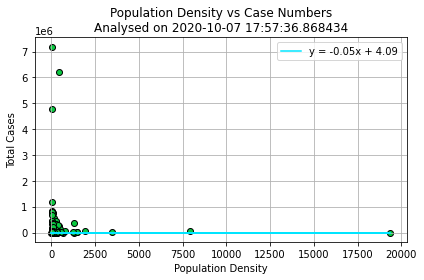

In [162]:
# Scatter Plot
x_pop_density = clean_pop_density_case['population_density']
y_total_cases = clean_pop_density_case['total_cases']

# Linear Regression Equation
pop_slope, pop_int, pop_r, pop_p, pop_stderr = st.linregress(np.log10(x_pop_density), np.log10(y_total_cases))

pop_line_eq = f'y = {str(round(pop_slope,2))}x + {str(round(pop_int,2))}'

pop_line_of_best_fit = np.log10(x_pop_density) * pop_slope + pop_int


fig1, ax1 = plt.subplots()
ax1.set_title(f'Population Density vs Case Numbers\nAnalysed on {current_time}')
ax1.set_ylabel(f'Total Cases')
ax1.set_xlabel(f'Population Density')
ax1.scatter(x_pop_density,y_total_cases, edgecolors='#000000', c='#0ac940')
ax1.plot(x_pop_density, pop_line_of_best_fit, c='#00e5ff')
ax1.grid(True)
fig1.tight_layout()
ax1.legend([pop_line_eq])
print(f'The r-squared value is: {pop_r**2}\nThe linear regression equation is {pop_line_eq}')
plt.savefig('Images\population_den_total_cases.png')
plt.show()


In [163]:
# Determining Outliers for Population Density
pop_quartile = clean_pop_density_case['population_density'].quantile([0.25,0.5,0.75])

# First Quartile
Q1_p = pop_quartile[0.25] # Population

# Third Quartile
Q3_p = pop_quartile[0.75] # Population

# Interquartile Ranges
IQR_p = Q3_p - Q1_p # Population

# Upper and Lower Bound Vales
lower_bound_p = Q1_p-(IQR_p*1.5) # Population
upper_bound_p = Q3_p+(IQR_p*1.5) # Population


# Outliers
# Population
outliers_p = x_pop_density.loc[(x_pop_density<lower_bound_p)|(x_pop_density>upper_bound_p)]

print(f'The Outliers for Population Density are\n {[p for p in outliers_p]}')


The Outliers for Population Density are
 [584.8, 1265.036, 1935.9070000000002, 1308.82, 664.4630000000001, 3457.1, 527.967, 594.561, 19347.5, 1454.433, 1454.037, 622.962, 508.54400000000004, 778.202, 494.869, 7915.731, 556.6669999999999, 1209.088]


In [164]:
# List of Countries that are Outliers based on Population Density
country_outliers_p = pd.DataFrame(clean_pop_density_case.loc[(clean_pop_density_case['population_density']<lower_bound_p)|(clean_pop_density_case['population_density']>upper_bound_p)])
country_outliers_p

,location,date,total_cases,population_density
0,Aruba,2020-09-30,3934.0,584.800
18,Bangladesh,2020-09-30,362043.0,1265.036
20,Bahrain,2020-09-30,70422.0,1935.907
25,Bermuda,2020-09-30,181.0,1308.820
28,Barbados,2020-09-30,190.0,664.463
73,Gibraltar,2020-09-30,391.0,3457.100
107,South Korea,2020-09-30,23812.0,527.967
110,Lebanon,2020-09-30,38377.0,594.561
121,Monaco,2020-09-30,214.0,19347.500
124,Maldives,2020-09-30,10194.0,1454.433


In [165]:
# Outliers for Total Cases
quartile_t = clean_pop_density_case['total_cases'].quantile([0.25,0.5,0.75])

# First Quartile
Q1_t = quartile_t[0.25]

# Third Quartile
Q3_t = quartile_t[0.75]

# Interquartile Range
IQR_t = Q3_t-Q1_t

# Upper and Lower Bound Values
lower_bound_t = Q1_t - (IQR_t * 1.5)
upper_bound_t = Q3_t + (IQR_t * 1.5)

# Outlier values
outliers_t = y_total_cases.loc[(y_total_cases<lower_bound_t)|(y_total_cases>upper_bound_t)]


In [166]:
# List of Outlier Countries based on Total Cases
country_outliers_t = pd.DataFrame(clean_pop_density_case.loc[(clean_pop_density_case['total_cases']<lower_bound_t)|(clean_pop_density_case['total_cases']>upper_bound_t)])
country_outliers_t

,location,date,total_cases,population_density
7,Argentina,2020-09-30,736596.0,16.177
18,Bangladesh,2020-09-30,362043.0,1265.036
27,Brazil,2020-09-30,4777522.0,25.040
35,Chile,2020-09-30,461300.0,24.282
41,Colombia,2020-09-30,824042.0,44.223
50,Germany,2020-09-30,289219.0,237.016
60,Spain,2020-09-29,758172.0,93.105
66,France,2020-09-30,550690.0,122.578
69,United Kingdom,2020-09-30,446156.0,272.898
89,Indonesia,2020-09-30,282724.0,145.725


In [167]:
# Removing Outlier Countries
no_outlier_df = clean_pop_density_case[
    (clean_pop_density_case['total_cases']>lower_bound_t) &             
    (clean_pop_density_case['total_cases']<upper_bound_t) &
    (clean_pop_density_case['population_density']>lower_bound_p)&
    (clean_pop_density_case['population_density']<upper_bound_p)
    ]

no_outlier_df

,location,date,total_cases,population_density
1,Afghanistan,2020-09-30,39254.0,54.422
2,Angola,2020-09-30,4905.0,23.890
4,Albania,2020-09-30,13518.0,104.871
5,Andorra,2020-09-30,1966.0,163.755
6,United Arab Emirates,2020-09-30,93090.0,112.442
...,...,...,...,...
204,Vietnam,2020-09-30,1094.0,308.127
205,Kosovo,2020-09-30,15574.0,168.155
206,Yemen,2020-09-30,2035.0,53.508
208,Zambia,2020-09-30,14715.0,22.995


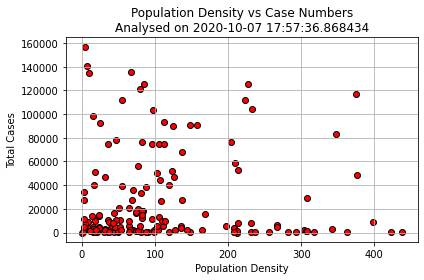

In [169]:
# Scatter Plot after removing Outliers
x_pop_density_no_outlier = no_outlier_df['population_density']
y_total_cases_no_outlier = no_outlier_df['total_cases']

fig1, ax1 = plt.subplots()
ax1.set_title(f'Population Density vs Case Numbers\nAnalysed on {current_time}')
ax1.set_ylabel(f'Total Cases')
ax1.set_xlabel(f'Population Density')
ax1.scatter(x_pop_density_no_outlier,y_total_cases_no_outlier, edgecolors='#000000', c='#ff0000')
ax1.grid(True)
fig1.tight_layout()
plt.savefig('Images\population_den_total_cases_noOutlier.png')
plt.show()

The r-aquared value is: 5.135299155373187e-05
The linear regression equation is y = 2.66x + 26547.04


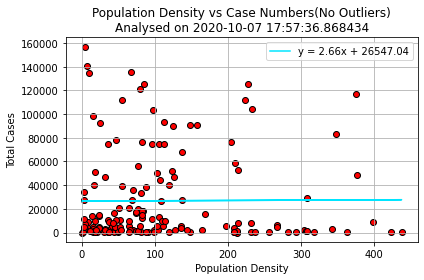

In [171]:
# Plotting a Linear Regression
slope, intersection, r, p, stderr = st.linregress(x_pop_density_no_outlier,y_total_cases_no_outlier)

# Linear Regression Equation
line_eq = f'y = {str(round(slope,2))}x + {str(round(intersection,2))}'

# Line of Best Fit
line_of_best_fit = x_pop_density_no_outlier * slope + intersection

x_pop_density_no_outlier = no_outlier_df['population_density']
y_total_cases_no_outlier = no_outlier_df['total_cases']

fig1, ax1 = plt.subplots()
ax1.plot(x_pop_density_no_outlier,line_of_best_fit,c='#00e5ff')
ax1.set_title(f'Population Density vs Case Numbers(No Outliers)\nAnalysed on {current_time}')
ax1.set_ylabel(f'Total Cases')
ax1.set_xlabel(f'Population Density')
ax1.scatter(x_pop_density_no_outlier,y_total_cases_no_outlier, edgecolors='#000000', c='#ff0000')
ax1.grid(True)
ax1.legend([line_eq])
fig1.tight_layout()
plt.savefig('Images\population_den_total_cases_noOutlier.png')
print(f'The r-aquared value is: {r**2}\nThe linear regression equation is {line_eq}')
plt.show()

## Summary
#### The objective of the first part of the analyses was to determine if there was indeed a correlation between population density and the total number of cases. Based on the first scatter plot analyses and a generation of the linear regression analysis, the correlation appeared to be very weak with a r-squared value of 0.0004. Therefore, a further analyses was undertaken wherein the outlier countries based on either total cases and population density, were removed and reanalysed. Based on the latter data, the correlation appears to also be significantly low, with a r-squared value of 0.002. This indicates that factors apart from population density maybe contributing to higher case numbers in countries where population densities are low, for example, the United States.  

# GDP vs death rate and infection rate

#### GDP vs Infection Rate and Death Rate

In [142]:
# Perusing the raw data set once more
raw_covid_19_data.columns

Index([&#39;iso_code&#39;, &#39;continent&#39;, &#39;location&#39;, &#39;date&#39;, &#39;total_cases&#39;, &#39;new_cases&#39;,
       &#39;new_cases_smoothed&#39;, &#39;total_deaths&#39;, &#39;new_deaths&#39;,
       &#39;new_deaths_smoothed&#39;, &#39;total_cases_per_million&#39;,
       &#39;new_cases_per_million&#39;, &#39;new_cases_smoothed_per_million&#39;,
       &#39;total_deaths_per_million&#39;, &#39;new_deaths_per_million&#39;,
       &#39;new_deaths_smoothed_per_million&#39;, &#39;new_tests&#39;, &#39;total_tests&#39;,
       &#39;total_tests_per_thousand&#39;, &#39;new_tests_per_thousand&#39;,
       &#39;new_tests_smoothed&#39;, &#39;new_tests_smoothed_per_thousand&#39;,
       &#39;tests_per_case&#39;, &#39;positive_rate&#39;, &#39;tests_units&#39;, &#39;stringency_index&#39;,
       &#39;population&#39;, &#39;population_density&#39;, &#39;median_age&#39;, &#39;aged_65_older&#39;,
       &#39;aged_70_older&#39;, &#39;gdp_per_capita&#39;, &#39;extreme_poverty&#39;,
      

In [143]:
# Calculating infection rate for each country

country_list = list((raw_covid_19_data['location']).drop_duplicates())
country_list

list_of_countries = []

rate_of_infection = []

# Using a for loop to calculate the rate of infection
for country in country_list:
    
    # Adds the total number of cases till the 30th of September
    new_case = raw_covid_19_data[raw_covid_19_data['location']==country]['new_cases'].sum()

    # This will take the first value and use it in subsequent calculations
    population = raw_covid_19_data[raw_covid_19_data['location']==country]['population'].head(1)
    
    # Calulating rate of infection as a percentage
    infection_rates = float((new_case/population * 100))

    rate_of_infection.append(infection_rates)

    list_of_countries.append(country)


    print(f'Appending data for {country}\n')
    print(f'Population: {float(population)}\nInfection Rate: {float(round(infection_rates,2))}\n')
    



Appending data for Aruba

Population: 106766.0
Infection Rate: 3.68

Appending data for Afghanistan

Population: 38928341.0
Infection Rate: 0.1

Appending data for Angola

Population: 32866268.0
Infection Rate: 0.01

Appending data for Anguilla

Population: 15002.0
Infection Rate: 0.02

Appending data for Albania

Population: 2877800.0
Infection Rate: 0.47

Appending data for Andorra

Population: 77265.0
Infection Rate: 2.54

Appending data for United Arab Emirates

Population: 9890400.0
Infection Rate: 0.94

Appending data for Argentina

Population: 45195777.0
Infection Rate: 1.63

Appending data for Armenia

Population: 2963234.0
Infection Rate: 1.68

Appending data for Antigua and Barbuda

Population: 97928.0
Infection Rate: 0.1

Appending data for Australia

Population: 25499881.0
Infection Rate: 0.11

Appending data for Austria

Population: 9006400.0
Infection Rate: 0.5

Appending data for Azerbaijan

Population: 10139175.0
Infection Rate: 0.4

Appending data for Burundi

Populati

In [144]:
# Creating a new DataFrame by combining both lists
country_infection_rate = pd.DataFrame({
    'Country':list_of_countries,
    'Infection Rate': rate_of_infection
})

country_infection_rate = country_infection_rate[
    (country_infection_rate['Country']!='World')&
    (country_infection_rate['Country']!='International')
    ]

country_infection_rate.to_csv('Resources\country_infection_rate.csv')
country_infection_rate


,Country,Infection Rate
0,Aruba,3.684694
1,Afghanistan,0.100837
2,Angola,0.014924
3,Anguilla,0.019997
4,Albania,0.469734
...,...,...
205,Kosovo,0.805785
206,Yemen,0.006823
207,South Africa,1.134019
208,Zambia,0.080043


In [145]:
# Selecting relevant columns for data Analysis
gdp_death_rate = raw_covid_19_data[['location','gdp_per_capita','total_deaths']]

# Dropping International and World From the DataFrame
gdp_death_rate = gdp_death_rate[
    (gdp_death_rate['location']!='World')&
    (gdp_death_rate['location']!='International')]

# Dropping Duplicate Rows
gdp_death_rate = gdp_death_rate.drop_duplicates('location',keep='last').reset_index(drop=True)

In [146]:
merged_df_td_inf = pd.DataFrame({
    'Country':gdp_death_rate['location'],
    'GDP': gdp_death_rate['gdp_per_capita'],
    'Total Deaths':gdp_death_rate['total_deaths'],
    'Infection Rate':country_infection_rate['Infection Rate']
})

merged_df_td_inf

,Country,GDP,Total Deaths,Infection Rate
0,Aruba,35973.781,26.0,3.684694
1,Afghanistan,1803.987,1458.0,0.100837
2,Angola,5819.495,179.0,0.014924
3,Anguilla,0.000,0.0,0.019997
4,Albania,11803.431,384.0,0.469734
...,...,...,...,...
205,Kosovo,9795.834,625.0,0.805785
206,Yemen,1479.147,588.0,0.006823
207,South Africa,12294.876,16667.0,1.134019
208,Zambia,3689.251,332.0,0.080043


In [147]:
# Dropping Countries that have no reported cases, deaths or GDP
merged_df_td_inf = merged_df_td_inf[
    (merged_df_td_inf['GDP']>0)&
    (merged_df_td_inf['Total Deaths']>0)&
    (merged_df_td_inf['Infection Rate']>0)
]

merged_df_td_inf

,Country,GDP,Total Deaths,Infection Rate
0,Aruba,35973.781,26.0,3.684694
1,Afghanistan,1803.987,1458.0,0.100837
2,Angola,5819.495,179.0,0.014924
4,Albania,11803.431,384.0,0.469734
6,United Arab Emirates,67293.483,416.0,0.941216
...,...,...,...,...
205,Kosovo,9795.834,625.0,0.805785
206,Yemen,1479.147,588.0,0.006823
207,South Africa,12294.876,16667.0,1.134019
208,Zambia,3689.251,332.0,0.080043


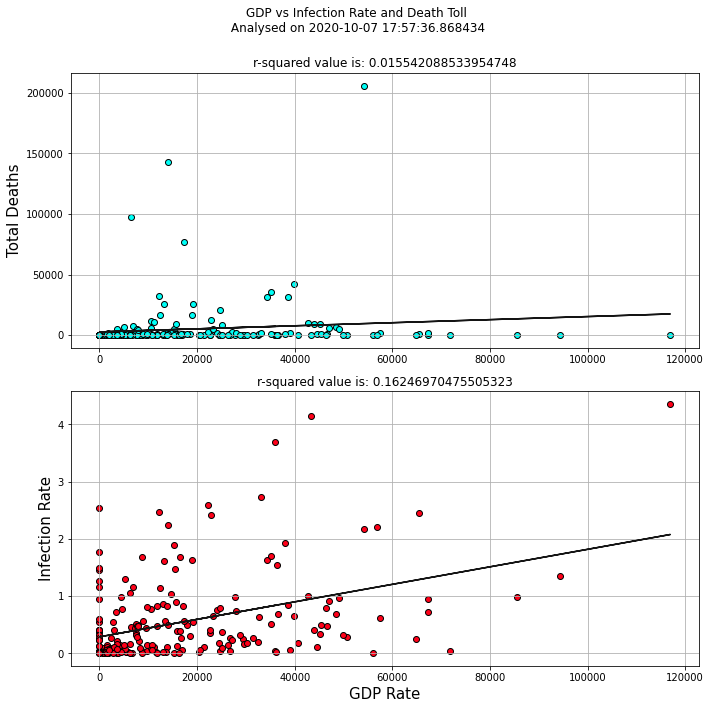

In [161]:
# Plotting Two Subplots
x_gdp = gdp_death_rate['gdp_per_capita']
y_td = gdp_death_rate['total_deaths']
y_inf_rate = country_infection_rate['Infection Rate']

# Setting the Linear Regression GDP vs Total Deaths

gdp_slope, gdp_int, gdp_r, gdp_p, gdp_stderr = st.linregress(x_gdp, y_td)

gdpdr_line_eq = f'y = {str(round(gdp_slope,2))}x + {str(round(gdp_int,2))}'

gdpdr_best_fit = x_gdp * gdp_slope + gdp_int

# Linear Regression for GDP vs Infection Rate

gdpinf_slope, gdpinf_int, gdpinf_r, gdpinf_p, gdpinf_stderr = st.linregress(x_gdp,y_inf_rate)

gdpinf_line_eq = f'y = {str(round(gdpinf_slope,2))}x + {str(round(gdpinf_int,2))}'

gdpinf_best_fit = x_gdp * gdpinf_slope + gdpinf_int

# Plotting

fig2, ax2 = plt.subplots(2)
fig2.set_size_inches(10,10)
fig2.suptitle(f'GDP vs Infection Rate and Death Toll\n Analysed on {current_time}\n')
plt.xlabel('GDP Rate', fontsize=15)

ax2[0].scatter(x_gdp, y_td, edgecolor='black', c='#00fff7')
ax2[0].set_ylabel('Total Deaths',fontsize=15)
ax2[0].plot(x_gdp, gdpdr_best_fit, c='#141414')
ax2[0].set_title(f'r-squared value is: {gdp_r**2}')

ax2[1].scatter(x_gdp, y_inf_rate, edgecolor='black', c='#ff0019')
ax2[1].set_ylabel('Infection Rate',fontsize=15)
ax2[1].plot(x_gdp, gdpinf_best_fit, c='#141414')
ax2[1].set_title(f'r-squared value is: {gdpinf_r**2}')

fig2.tight_layout()
ax2[0].grid(True)
ax2[1].grid(True)
plt.savefig('Images\gdp_death_rate_infection.png')
plt.show()

0.1267775668927649

# HDI vs total cases and death rate

In [18]:
# Creating a new DataFrame for HDI vs deathrate
hdi_dataframe = raw_covid_19_data[['location','total_deaths','human_development_index']].drop_duplicates('location',keep='last').reset_index(drop=True)

hdi_dataframe = hdi_dataframe[
    (hdi_dataframe['location']!='World')&
    (hdi_dataframe['location']!='International')
]
hdi_dataframe



,location,total_deaths,human_development_index
0,Aruba,26.0,0.000
1,Afghanistan,1458.0,0.498
2,Angola,179.0,0.581
3,Anguilla,0.0,0.000
4,Albania,384.0,0.785
...,...,...,...
205,Kosovo,625.0,0.000
206,Yemen,588.0,0.452
207,South Africa,16667.0,0.699
208,Zambia,332.0,0.588


In [19]:
# Creating a random list of countries
random_country_list = hdi_dataframe.sample(20)
  
x_country = random_country_list['location']
y_hdi = random_country_list['human_development_index']
y_total_deaths = random_country_list['total_deaths']

random_country_df = pd.DataFrame({
    'Country':x_country,
    'HDI': y_hdi,
    'Total Deaths':y_total_deaths
})




In [20]:
# Creating a New Data Frame based on Selected Random Countries
new_random_df = random_country_df.sort_values(by=['Total Deaths','HDI'],ascending=False)
new_random_df


,Country,HDI,Total Deaths
162,Russia,0.816,20545.0
7,Argentina,0.825,16519.0
101,Japan,0.909,1564.0
8,Armenia,0.755,958.0
157,Paraguay,0.702,841.0
201,Venezuela,0.761,621.0
108,Kuwait,0.803,607.0
206,Yemen,0.452,588.0
112,Libya,0.706,540.0
6,United Arab Emirates,0.863,416.0


In [21]:
# To gain 

In [22]:
# Mention in the Y axis that scaling was done due to the vast difference in values and this was required for visualisation process to help better understand the comparison 

# Alison Chambers

## Australia Weather

#### Find average new cases per month

In [23]:
#Read in Aus Dataframe
aus_df = pd.read_csv('Resources/australia_df.csv')

#Filter dataframe for info needed
aus_date=aus_df[["date", "new_cases"]]

#Create column with months 
month=pd.DataFrame(index=range(0,275), columns=["Month"], dtype='float')
month.iloc[1:32]="1"
month.iloc[32:61]="2"
month.iloc[61:92]="3"
month.iloc[92:122]="4"
month.iloc[122:153]="5"
month.iloc[153:183]="6"
month.iloc[183:214]="7"
month.iloc[214:245]="8"
month.iloc[245:275]="9"

#Add column to dataframe
aus_date["Month"]=month

#Groupby month to get monthly average
aus_av_cases=aus_date.groupby(["Month"]).mean()
aus_av_cases.sort_values(by="Month", ascending=True)


,new_cases
Month,
1,0.225806
2,0.620690
3,146.193548
4,72.966667
5,14.161290
6,19.400000
7,275.354839
8,302.161290
9,46.433333


#### Find average temperature per month 

In [24]:
#Read in Aus temperature history
aus_temp = pd.read_csv("Resources/Canberra_HistoricalData.csv")

#Filter to get monthly average temperature 
aus_av_temp=aus_temp.iloc[38,1:10]
aus_av_temp=pd.DataFrame(aus_av_temp)
aus_av_temp.columns=["Temp"]
aus_av_temp.index=aus_av_cases.index
aus_av_temp

,Temp
Month,
1,30.8
2,28.2
3,25.2
4,21.0
5,16.6
6,13.4
7,12.8
8,14.0
9,18.1


#### Plot line graph 

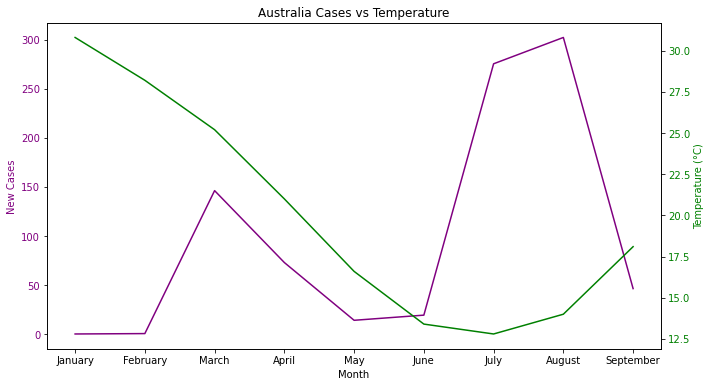

In [25]:
#Define axis
x_axis=np.arange(0,9,1)
y_axis1=aus_av_cases["new_cases"]
y_axis2=aus_av_temp["Temp"]
y_axis2=y_axis2.astype(float)
labels=["January", "February", "March", "April", "May", "June", "July", "August", "September"]

#Plot & format line 1
fig, ax1=plt.subplots(figsize=(11,6))
ax1.plot(x_axis, y_axis1, color="purple")
ax1.set_xlabel("Month")
ax1.set_ylabel("New Cases", color="purple")
ax1.tick_params(axis='y', labelcolor="purple")

#Plot & format line 2
ax2=ax1.twinx()
ax2.plot(x_axis, y_axis2, color="green")
ax2.set_ylabel("Temperature (°C)", color="green")
ax2.tick_params(axis='y', labelcolor="green")

#Add tick labels 
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, labels, rotation="vertical")

#Add title and labels
plt.title("Australia Cases vs Temperature")

#Save figure
plt.savefig("Outputdata\Australia.png")

## Canada Weather

In [26]:
#Read in Canada Dataframe
canada_df = pd.read_csv("Resources/canada_df.csv") 

#Filter dataframe for info needed
canada_date=canada_df[["date", "new_cases"]]

#Create column with months 
month=pd.DataFrame(index=range(0,275), columns=["Month"], dtype='float')
month.iloc[1:32]="1"
month.iloc[32:61]="2"
month.iloc[61:92]="3"
month.iloc[92:122]="4"
month.iloc[122:153]="5"
month.iloc[153:183]="6"
month.iloc[183:214]="7"
month.iloc[214:245]="8"
month.iloc[245:275]="9"

#Add column to dataframe
canada_date["Month"]=month

#Groupby month to get monthly average
canada_av_cases=canada_date.groupby(["Month"]).mean()
canada_av_cases.sort_values(by="Month", ascending=True)

,new_cases
Month,
1,0.096774
2,0.448276
3,238.967742
4,1472.100000
5,1244.903226
6,457.600000
7,383.161290
8,392.096774
9,967.366667


#### Find average temperature per month 

In [27]:
#Read in Canada temperature history
canada_temp = pd.read_csv("Resources/en_climate_daily_ON_6106001_2020_P1D.csv")

#Filter to get monthly average temperature 
canada_temp_group=canada_temp.groupby("Month")
canada_av_temp=canada_temp_group["Max Temp (°C)"].mean()
canada_av_temp=canada_av_temp.iloc[0:9]
canada_av_temp=pd.DataFrame(canada_av_temp)
canada_av_temp

,Max Temp (°C)
Month,
1,-2.583871
2,-2.065517
3,4.190323
4,10.203448
5,19.233333
6,25.556667
7,30.509677
8,25.077419
9,19.789655


#### Plot line graph

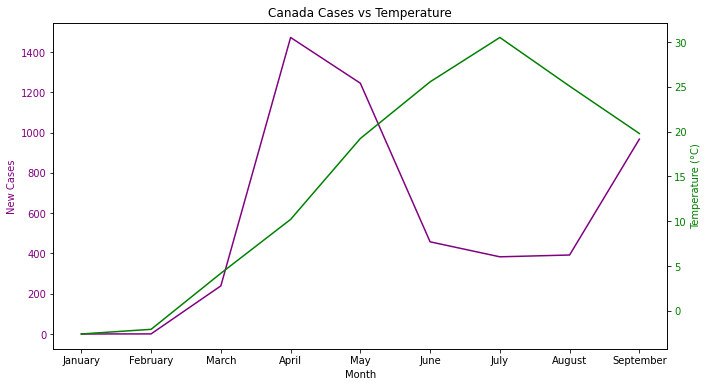

In [28]:
#Define axis
x_axis=np.arange(0,9,1)
y_axis1=canada_av_cases["new_cases"]
y_axis2=canada_av_temp["Max Temp (°C)"]
labels=["January", "February", "March", "April", "May", "June", "July", "August", "September"]

#Plot & format line 1
fig, ax1=plt.subplots(figsize=(11,6))
ax1.plot(x_axis, y_axis1, color="purple")
ax1.set_xlabel("Month")
ax1.set_ylabel("New Cases", color="purple")
ax1.tick_params(axis='y', labelcolor="purple")

#Plot & format line 2
ax2=ax1.twinx()
ax2.plot(x_axis, y_axis2, color="green")
ax2.set_ylabel("Temperature (°C)", color="green")
ax2.tick_params(axis='y', labelcolor="green")

#Add tick labels 
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, labels, rotation="vertical")

#Add title and labels
plt.title("Canada Cases vs Temperature")

#Save figure
plt.savefig("Outputdata\Canada.png")

#### World Heatmap - COVID-19 Infection Rates

In [29]:
#Read in location Dataframe
world_location = pd.read_csv("Resources/world_country_and_usa_states_latitude_and_longitude_values.csv")

#Filter info
world_location=world_location[["country_code", "latitude", "longitude", "country"]]
world_location=world_location.rename(columns={"country":"Country"})

#Read in country infection rate Dataframe
world_infection_rate = pd.read_csv("Resources/country_infection_rate.csv")

#Merge Dataframes
world_df=world_location.merge(world_infection_rate, on="Country", how="outer")

#Reorganise
world_df=world_df[["Country", "latitude", "longitude", "Infection Rate"]]

#Drop NaN values 
world_df=world_df.dropna()
world_df

,Country,latitude,longitude,Infection Rate
0,Andorra,42.546245,1.601554,2.544490
1,United Arab Emirates,23.424076,53.847818,0.941216
2,Afghanistan,33.939110,67.709953,0.100837
3,Antigua and Barbuda,17.060816,-61.796428,0.103137
4,Anguilla,18.220554,-63.068615,0.019997
...,...,...,...,...
239,Kosovo,42.602636,20.902977,0.805785
240,Yemen,15.552727,48.516388,0.006823
242,South Africa,-30.559482,22.937506,1.134019
243,Zambia,-13.133897,27.849332,0.080043


In [30]:
# Store latitude and longitude in locations
locations = world_df[["latitude", "longitude"]]

# Store infection rates and convert to float 
infection_rates = world_df["Infection Rate"].astype(float)

In [31]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=infection_rates)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height=&#39;420px&#39;))